In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from keras.utils import image_dataset_from_directory
from keras.models import Sequential
from keras.layers import Input, Conv2D, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D, Dense, RandomFlip, RandomRotation, RandomTranslation, RandomZoom, Rescaling, GlobalMaxPooling2D, Flatten
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from keras.models import load_model

import cv2

In [79]:
classes_labels = { 
            0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

In [90]:
train, test = image_dataset_from_directory(directory = r'C:/Users/hp/Documents/TrafficSign/Train', shuffle = True, image_size=(128, 128), batch_size = 32, validation_split = 0.2, seed=123, subset='both')

Found 39209 files belonging to 43 classes.
Using 31368 files for training.
Using 7841 files for validation.


In [199]:
values

,index,ClassId,Class_Name
0,2,2250,Speed limit (50km/h)
1,1,2220,Speed limit (30km/h)
2,13,2160,Yield
3,12,2100,Priority road
4,38,2070,Keep right
5,10,2010,No passing veh over 3.5 tons
6,4,1980,Speed limit (70km/h)
7,5,1860,Speed limit (80km/h)
8,25,1500,Road work
9,9,1470,No passing


    index  ClassId
0       2     2250
1       1     2220
2      13     2160
3      12     2100
4      38     2070
5      10     2010
6       4     1980
7       5     1860
8      25     1500
9       9     1470
10      7     1440
11      3     1410
12      8     1410
13     11     1320
14     18     1200
15     35     1200
16     17     1110
17     14      780
18     31      780
19     33      689
20     15      630
21     26      600
22     28      540
23     23      510
24     30      450
25     16      420
26      6      420
27     34      420
28     22      390
29     36      390
30     40      360
31     20      360
32     21      330
33     39      300
34     29      270
35     24      270
36     32      240
37     27      240
38     41      240
39     42      240
40     37      210
41      0      210
42     19      210
2250
210


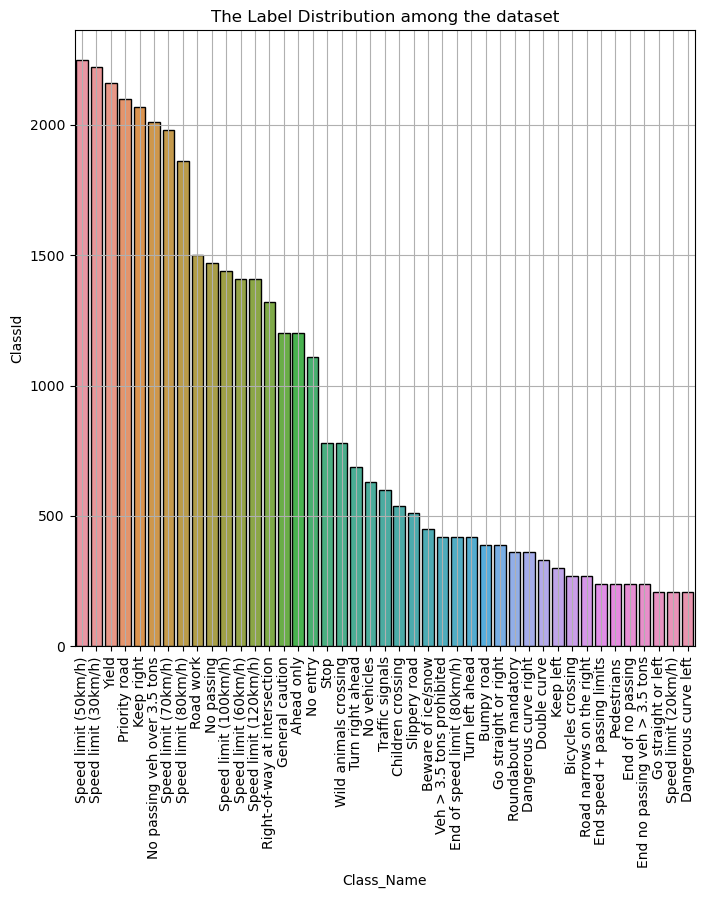

In [195]:
distribution = pd.read_csv(r'Train.csv')
# print(distribution)
values = pd.DataFrame(distribution['ClassId'].value_counts()).reset_index()
print(values)
values['Class_Name'] = values['index'].map(classes_labels)

print(values['ClassId'].max())
print(values['ClassId'].min())

classes = values['index'].nunique()

plt.figure(figsize=(8, 8))
sn.barplot(y = values['ClassId'], x = values['Class_Name'], edgecolor='black')
plt.xticks(rotation = 90)
plt.title("The Label Distribution among the dataset")
plt.grid(True)
plt.show()

The size of the train images: (32, 128, 128, 3)


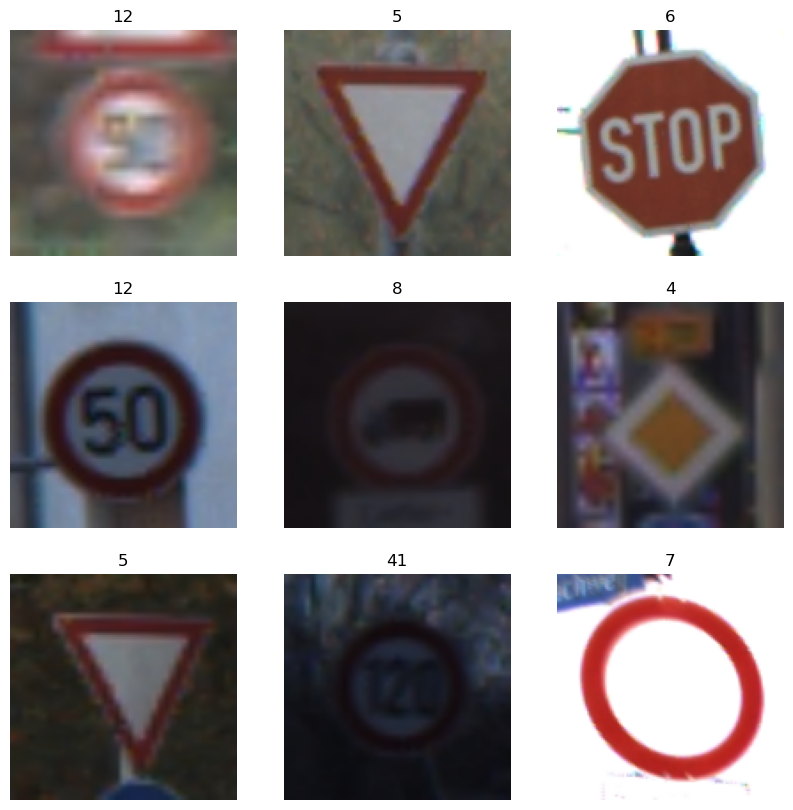

In [203]:
train_selector = train.as_numpy_iterator()
train_selector = train_selector.next()

print(f'The size of the train images: {train_selector[0].shape}')
numbers = 9 # Any perfect square number
i = 1

plt.figure(figsize=(10, 10))

for (label, image) in enumerate(train_selector[0][: numbers]):
    plt.subplot(np.sqrt(numbers).astype('int64'), np.sqrt(numbers).astype('int64'), i)
    plt.imshow(image.astype('int64'))
    plt.title(train_selector[1][label])
    plt.axis('off')
    i += 1
plt.show()

In [202]:
train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [200]:
train_ratio = 0.8
dataset_size = len(train)
train_size = int(train_ratio * dataset_size)
validation_size = dataset_size - train_size

train_set = train.take(train_size)
validation_set = train.skip(train_size).take(validation_size)

print(f'The Train dataset size: {len(train_set)*32}')
print(f'The Validation dataset size: {len(validation_set)*32}')

The Train dataset size: 25088
The Validation dataset size: 6304


In [93]:
model = Sequential([
    Input(shape=(128, 128, 3)),
    
    Rescaling(1.0/255.0),
    
    Conv2D(filters=16, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(),
    
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(),
    
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(),
    
    Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(),
    
    #GlobalAveragePooling2D(),
    Flatten(),
    
    Dense(units=32, activation='relu'),
    Dense(units=64, activation='relu'),
    Dense(units=128, activation='relu'),
    Dense(units=256, activation='relu'),
    Dense(units=128, activation='relu'),
    Dense(units=classes, activation='softmax')
])


print(model.summary())


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 128, 128, 3)       0         
                                                                 
 conv2d_38 (Conv2D)          (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 63, 63, 16)        0         
 ng2D)                                                           
                                                                 
 batch_normalization_8 (Bat  (None, 63, 63, 16)        64        
 chNormalization)                                                
                                                                 
 conv2d_39 (Conv2D)          (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_22 (MaxPooli  (None, 30, 30, 32)       

In [94]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [95]:
ES = EarlyStopping(monitor='val_accuracy', min_delta=0, verbose=1, restore_best_weights=True, patience=10, mode='max')
RLP = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)
MCP = ModelCheckpoint('Best_Model.keras', verbose=1, save_best_only=True, monitor='val_accuracy', mode='max')

In [96]:
history = model.fit(train_set, validation_data=validation_set, epochs=30, callbacks=[ES, RLP, MCP])


Epoch 1/30
784/784 [==============================] - ETA: 0s - loss: 0.5892 - accuracy: 0.8267
Epoch 1: val_accuracy improved from -inf to 0.94841, saving model to Best_Model.keras
784/784 [==============================] - 114s 141ms/step - loss: 0.5892 - accuracy: 0.8267 - val_loss: 0.1748 - val_accuracy: 0.9484 - lr: 0.0010
Epoch 2/30
784/784 [==============================] - ETA: 0s - loss: 0.0863 - accuracy: 0.9743
Epoch 2: val_accuracy improved from 0.94841 to 0.96242, saving model to Best_Model.keras
784/784 [==============================] - 92s 117ms/step - loss: 0.0863 - accuracy: 0.9743 - val_loss: 0.1276 - val_accuracy: 0.9624 - lr: 0.0010
Epoch 3/30
784/784 [==============================] - ETA: 0s - loss: 0.0674 - accuracy: 0.9808
Epoch 3: val_accuracy improved from 0.96242 to 0.97500, saving model to Best_Model.keras
784/784 [==============================] - 93s 118ms/step - loss: 0.0674 - accuracy: 0.9808 - val_loss: 0.0918 - val_accuracy: 0.9750 - lr: 0.0010
Epoch 

Epoch 27/30
784/784 [==============================] - ETA: 0s - loss: 0.0033 - accuracy: 0.9992
Epoch 27: val_accuracy did not improve from 0.99586
784/784 [==============================] - 76s 97ms/step - loss: 0.0033 - accuracy: 0.9992 - val_loss: 0.0333 - val_accuracy: 0.9954 - lr: 1.0000e-04
Epoch 28/30
784/784 [==============================] - ETA: 0s - loss: 1.3115e-04 - accuracy: 1.0000
Epoch 28: val_accuracy did not improve from 0.99586
784/784 [==============================] - 72s 92ms/step - loss: 1.3115e-04 - accuracy: 1.0000 - val_loss: 0.0292 - val_accuracy: 0.9951 - lr: 1.0000e-04
Epoch 29/30
784/784 [==============================] - ETA: 0s - loss: 9.1350e-06 - accuracy: 1.0000
Epoch 29: val_accuracy did not improve from 0.99586
784/784 [==============================] - 73s 93ms/step - loss: 9.1350e-06 - accuracy: 1.0000 - val_loss: 0.0268 - val_accuracy: 0.9955 - lr: 1.0000e-04
Epoch 30/30
784/784 [==============================] - ETA: 0s - loss: 3.0700e-06 - acc

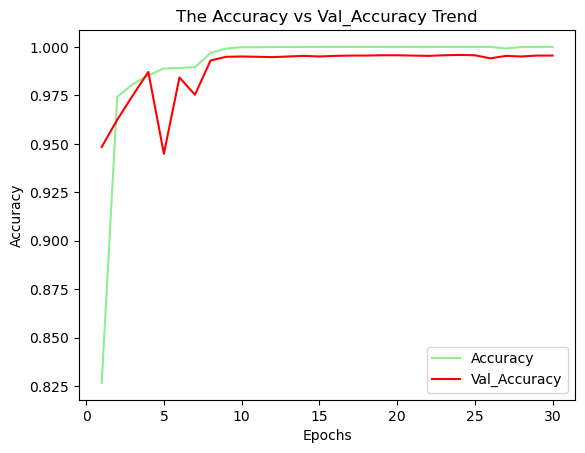

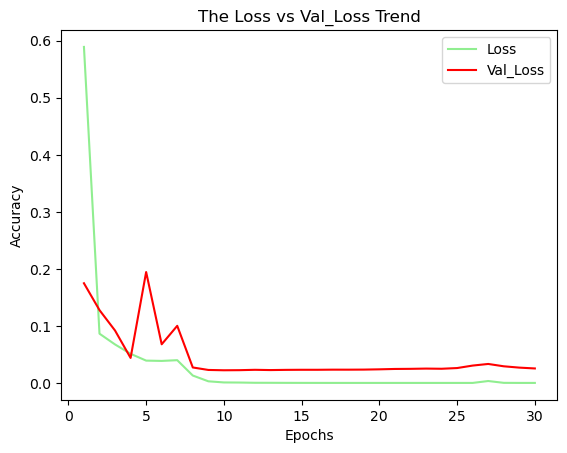

In [97]:
sn.lineplot(x = np.arange(1, len(history.history['accuracy'])+1), y = history.history['accuracy'], color='lightgreen')
sn.lineplot(x = np.arange(1, len(history.history['val_accuracy'])+1), y = history.history['val_accuracy'], color='red')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("The Accuracy vs Val_Accuracy Trend")
plt.legend(labels=['Accuracy', 'Val_Accuracy'])
plt.show()

sn.lineplot(x = np.arange(1, len(history.history['accuracy'])+1), y = history.history['loss'], color='lightgreen')
sn.lineplot(x = np.arange(1, len(history.history['val_accuracy'])+1), y = history.history['val_loss'], color='red')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("The Loss vs Val_Loss Trend")
plt.legend(labels=['Loss', 'Val_Loss'])
plt.show()

In [98]:
loss_score, accuracy_score = model.evaluate(test)
predictions = model.predict(test)

print(accuracy_score, loss_score)

246/246 [==============================] - 9s 34ms/step
0.9954087734222412 0.028409456834197044


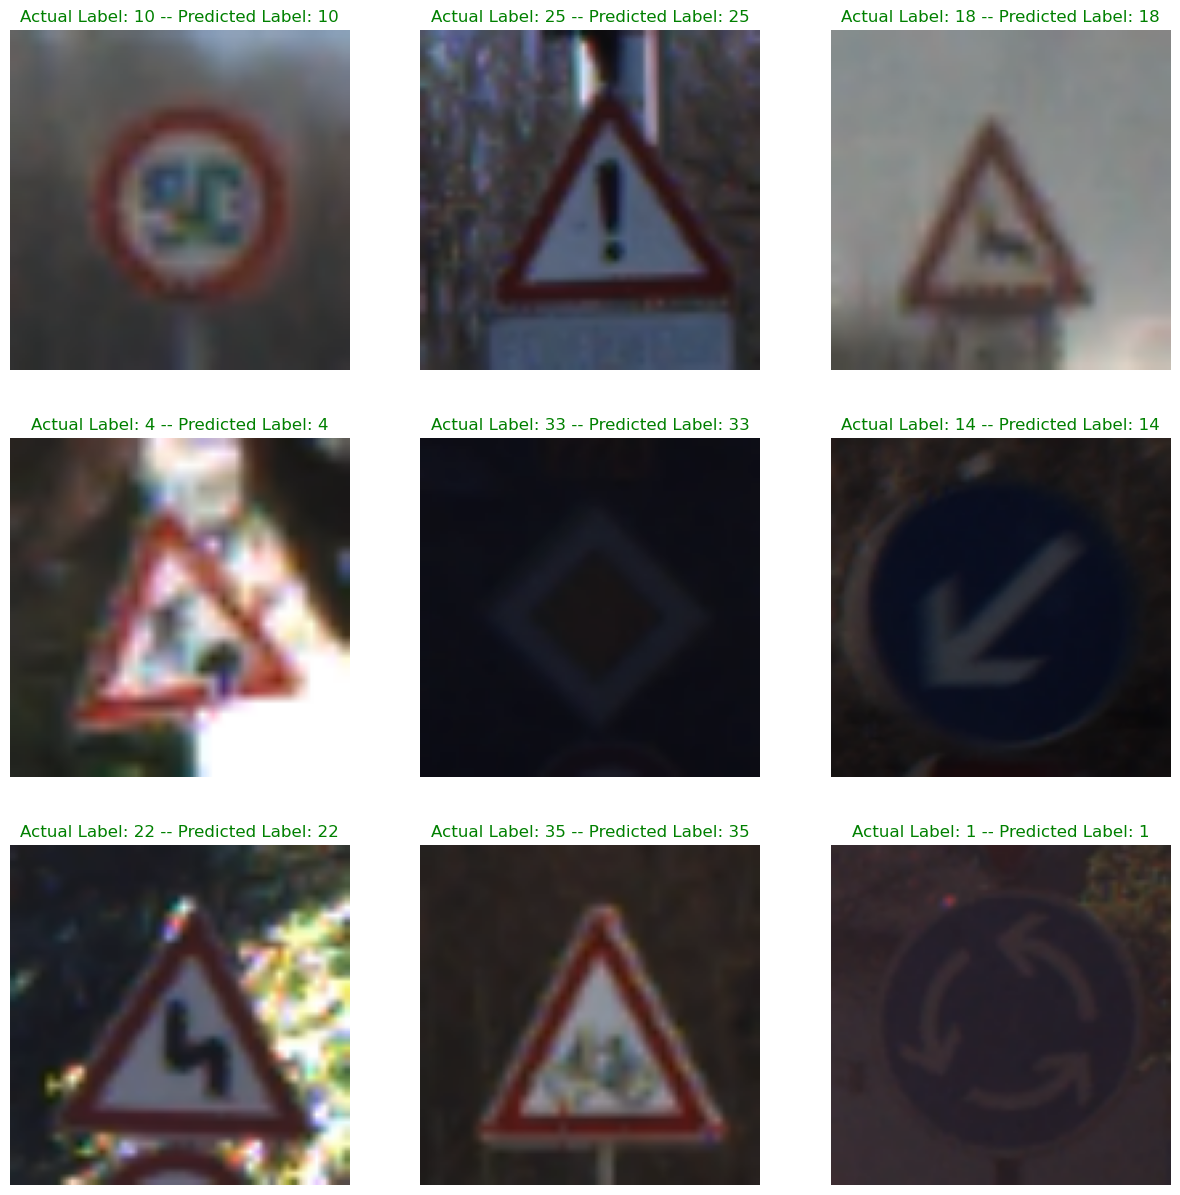

In [99]:
i = 1
plt.figure(figsize=(15, 15))
test_selector = test.as_numpy_iterator()
test_sel = test_selector.next()

for (label,image) in enumerate(test_sel[0][:numbers]):
    plt.subplot(np.sqrt(numbers).astype('int64'), np.sqrt(numbers).astype('int64'), i)
    plt.imshow(image.astype('int64'))
    color = 'g'
    if test_sel[1][i] != np.argmax(predictions[i]):
        color = 'r'
    plt.title(f'Actual Label: {test_sel[1][i]} -- Predicted Label: {np.argmax(predictions[i])}', color = color)
    plt.axis('off')
    i += 1
    
plt.show()

In [100]:
# Saving the model for Future Inferences

model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")

In [162]:
from PIL import Image

# open method used to open different extension image file
im = cv2.imread(r"C:/Users/hp/Documents/TrafficSign/Test/00092.png")

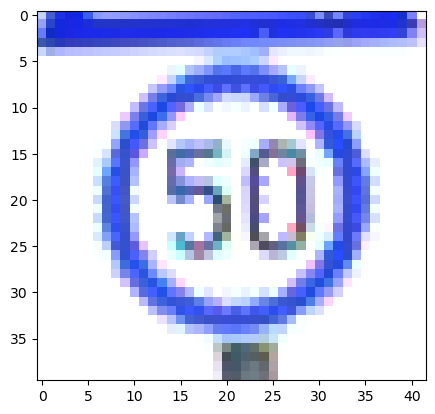

In [163]:
plt.imshow(im)

In [164]:
im.shape

(40, 42, 3)

In [165]:
im1=cv2.resize(im,(128,128))

In [166]:
im2=im1.reshape((1,128,128,3))

In [167]:
pred=model.predict(im2)

1/1 [==============================] - 0s 30ms/step


In [168]:
classes_labels[np.argmax(pred)]

'Ahead only'

In [131]:
model.predicttrain_set

<_TakeDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [130]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 128, 128, 3)       0         
                                                                 
 conv2d_38 (Conv2D)          (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 63, 63, 16)        0         
 ng2D)                                                           
                                                                 
 batch_normalization_8 (Bat  (None, 63, 63, 16)        64        
 chNormalization)                                                
                                                                 
 conv2d_39 (Conv2D)          (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_22 (MaxPooli  (None, 30, 30, 32)       